PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
PassengerId    0
Survived       0
Sex            0
Age            0
Embarked       0
dtype: int64


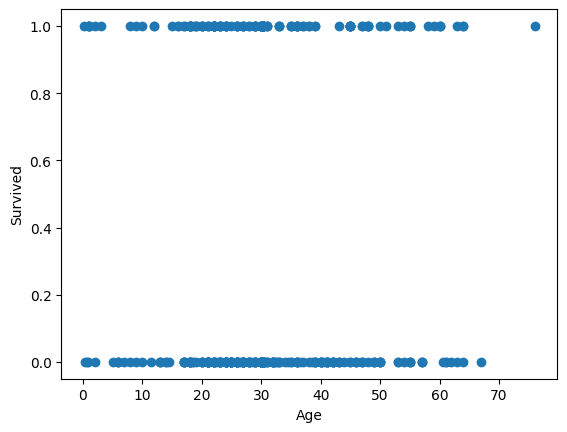

Survived
0    266
1    152
Name: count, dtype: int64
0.5476190476190477


In [4]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importing the datasets
r = pd.read_csv('tested.csv')

df = pd.DataFrame(r)

#checking for missing values
#print(df.isnull().sum())

#filling the missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
print(df.isnull().sum())

#feature selection
#as cabin has most null values we will drop this column
df=df.drop('Cabin',axis=1)

#dropping unrequired attributes
df=df.drop(['Name','Ticket','Pclass','Fare','SibSp','Parch'],axis=1)
print(df.isnull().sum())

#visualisation
plt.scatter(df['Age'], df['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

#Logistic Regression algorithm is required


#conversion and replacing categorical to numerical
df['Survived'] = pd.to_numeric(df['Survived'])
df['Age'] = pd.to_numeric(df['Age'])
df['Sex'].replace(['male', 'female'],[0, 1], inplace=True)
df['Embarked'].replace(['S', 'C', 'Q'],[1, 2, 3], inplace=True)
df['Sex'] = pd.to_numeric(df['Sex'])
df['Embarked'] = pd.to_numeric(df['Embarked'])

print(df['Survived'].value_counts())


#Defining x and y

from sklearn.model_selection import train_test_split

X=df.drop('PassengerId', axis=1)
X = X.drop('Survived', axis=1)
Y = df['Survived']

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

model = LogisticRegression()
pca = PCA(n_components=2)

pca.fit(X)

X = pca.transform(X)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)


model.fit(X_train, Y_train)

#predicting the model
Y_pred = model.predict(X_test)


#checking accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)


In [5]:
#Decision Tree

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dt=tree.DecisionTreeClassifier()

X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.3)

train=dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)

print(accuracy_score(y_test,y_pred))


0.9761904761904762


In [6]:
#Random Forest

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.3)

train=rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

print(accuracy_score(y_test,y_pred))


0.9841269841269841
